# Obtain data from yfinance

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import yfinance as yf

* A brief intro of yfinance *

In [4]:
# get stock data from past two year
start_date = dt.datetime.today() - dt.timedelta(days = 365 * 2)
end_date = dt.datetime.today()

# symbols for Microsoft (MSFT) and Apple (AAPL)
tickers = ['MSFT', 'AAPL']

# download data 
stock = yf.download(tickers, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [5]:
stock.head()

Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2023-06-29  187.710587  329.919891  188.185839  330.963659  187.067036   
2023-06-30  192.047165  335.325836  192.552104  337.482306  189.364023   
2023-07-03  190.552155  332.814850  191.958076  335.680297  189.859082   
2023-07-05  189.433334  332.972412  191.066972  336.418822  188.730366   
2023-07-06  189.908569  336.044647  190.116494  337.738313  187.324442   

Price                         Open                Volume            
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT  
Date                                                                
2023-06-29  327.527105  187.205648  329.585101  46347300  16997000  
2023-06-30  332.036980  189.730365  332.578547  85069600  26823800  
2023-07-03  331.416609  191.859062  333.996488  31458200  12508700  
2023-07-05  329.604794  189.670961  329.959268  46920300  18172400  
2023-07-06  330.363005  187.958097  332.135433  45094300  28161200

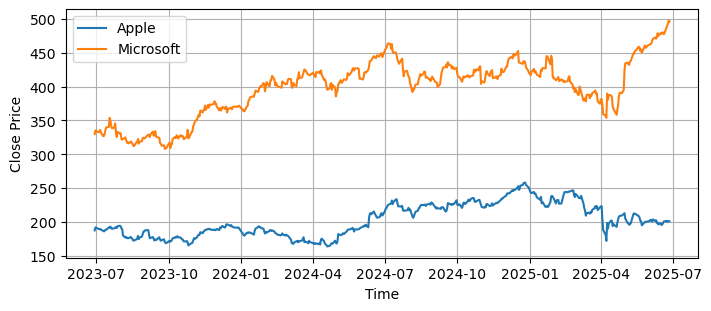

In [6]:
# Draw the close price for Apple and Microsoft
fig1, ax1 = plt.subplots(1, 1, figsize=[7, 3], layout='constrained')
ax1.plot(stock['Close']['AAPL'], label='Apple')
ax1.plot(stock["Close"]['MSFT'], label='Microsoft')
ax1.grid('on')
ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price')
ax1.legend()


Noticed that the raw close price for Apple and Microsoft are not ideal for comparing the performance of investing each company, due to the bias of their stock price difference. To better compare the stock price change, we normalized the price to the first date in the data, which becomes the cumulated rate of return of the stock. 

In [7]:
# get close price for each day
close = stock['Close']
# get the daily return ratio
normalized_return = close / close.iloc[0] - 1

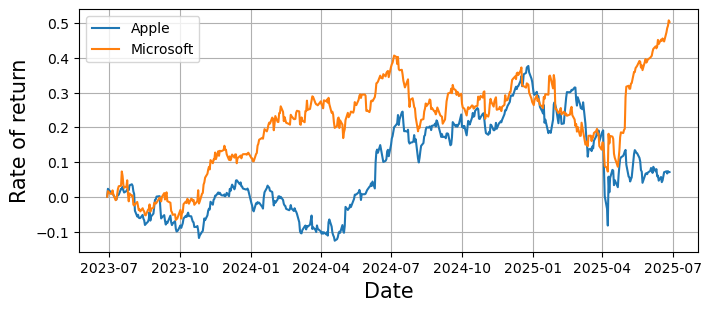

In [8]:
fig2, ax2 = plt.subplots(1, 1, figsize = [7,3], layout='constrained')
ax2.plot(normalized_return['AAPL'], label='Apple')
ax2.plot(normalized_return['MSFT'], label='Microsoft')
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Rate of return', fontsize=15)
ax2.legend()
ax2.grid('on')


Noticed that now the y-axis means the return per dollar investment on the first date for each stock. 

# Daily return of investments

In [9]:
# get the ratio of daily return
daily_return = (close / close.shift(1)).dropna()

# get log of daily return 
daily_return_log = np.log(daily_return)

In [10]:
daily_return_log

Ticker,AAPL,MSFT
Date,,
2023-06-30,0.022840,0.016253
2023-07-03,-0.007815,-0.007516
2023-07-05,-0.005889,0.000473
2023-07-06,0.002506,0.009184
2023-07-07,-0.005909,-0.011938
...,...,...
2025-06-23,0.002484,0.017854
2025-06-24,-0.005973,0.008421
2025-06-25,0.006271,0.004397


Text(0, 0.5, 'Log return')

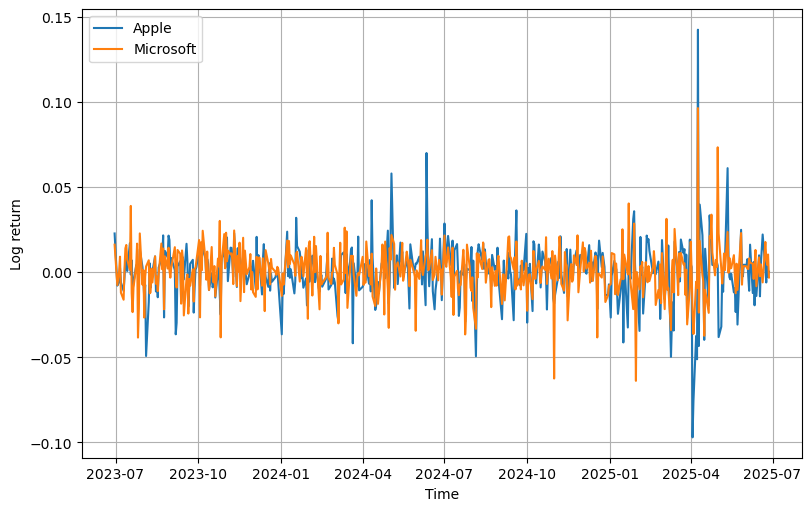

In [11]:
fig3, ax3 = plt.subplots(1, 1, figsize=[8, 5], layout='constrained')
ax3.plot(daily_return_log['AAPL'], label='Apple')
ax3.plot(daily_return_log['MSFT'], label='Microsoft')
ax3.legend()
ax3.grid('on')
ax3.set_xlabel('Time')
ax3.set_ylabel('Log return')

In [12]:
# get yearly volatility
np.std(daily_return_log, axis=0) * np.sqrt(252)

Ticker
AAPL    0.273332
MSFT    0.228981
dtype: float64

In [13]:
np.mean(daily_return_log, axis=0)

Ticker
AAPL    0.000138
MSFT    0.000815
dtype: float64

## Portfolio construction of two stock

Here, we investigate the properties of portfolio constructed by stock of Apple and Microsoft. We first inspect the portfolio return visually.

In [14]:
# make portfolio from two stock
w1 = 0.2  # investment ratio for Apple
w2 = 1 - w1  # investment ratio for Microsoft
portfolio_return = (
    w1 * normalized_return["AAPL"].values + w2 * normalized_return["MSFT"]
)

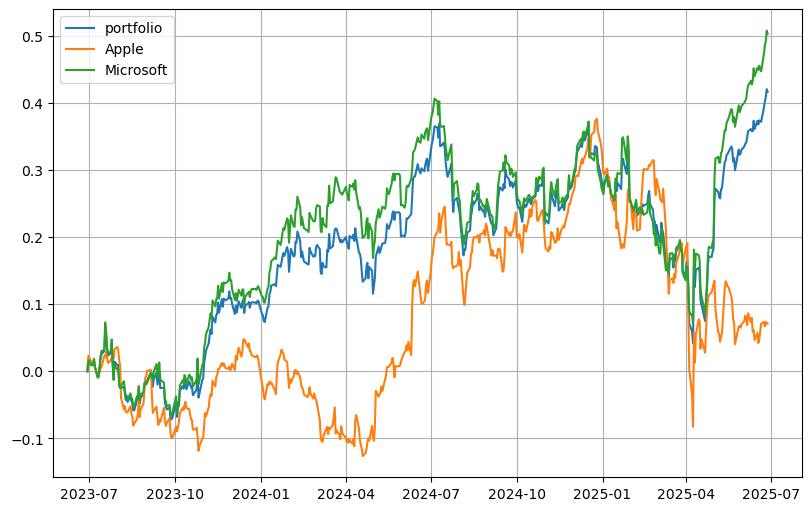

In [15]:
# show the portfolio return among the return of each stock
fig4, ax4 = plt.subplots(1, 1, figsize=[8, 5], layout="constrained")
ax4.plot(portfolio_return, label="portfolio")
ax4.plot(normalized_return["AAPL"], label="Apple")
ax4.plot(normalized_return["MSFT"], label="Microsoft")
ax4.legend()
ax4.grid("on")

Noticed that as the linear combination between two stock, the portfolio return is between the return of each stock. Next, we analyze the average return and volatility of constructed portfolio. We will be using log return in the following sections.

In [16]:
# get the linear combination of log return of two stocks
portfolio_daily_return_log = (
    w1 * daily_return_log["AAPL"] + w2 * daily_return_log["MSFT"]
)

In [17]:
print(f"mean of portfolio return: {np.mean(portfolio_daily_return_log)}")
print(f"Volatility of portfolio return: {np.std(portfolio_daily_return_log) * np.sqrt(252)}")

mean of portfolio return: 0.0006796887378962984
Volatility of portfolio return: 0.21734308590335144


In [18]:
print(np.mean(daily_return_log, axis=0))
print(np.std(daily_return_log, axis=0) * np.sqrt(252))

Ticker
AAPL    0.000138
MSFT    0.000815
dtype: float64
Ticker
AAPL    0.273332
MSFT    0.228981
dtype: float64


Noticed that the average return of the portfolio is between the return of each stock as suggested by the visual inspection of return, and the std of portfolio is less than that of each stocks. We can then use different diversification parameters between the two companies and constructed various protfolios. 

In [19]:
portfolio_return_log_mean = []
portfolio_return_log_std = []
# sweep different diversification ratio
w1_list = np.arange(0, 1, 0.01)
for w1 in w1_list:
    w2 = 1 - w1
    # construct portfolio return
    portfolio_daily_return_log = (
        w1 * daily_return_log["AAPL"] + w2 * daily_return_log["MSFT"]
    )
    portfolio_return_log_mean.append(np.mean(portfolio_daily_return_log))
    portfolio_return_log_std.append(np.std(portfolio_daily_return_log) * np.sqrt(252))

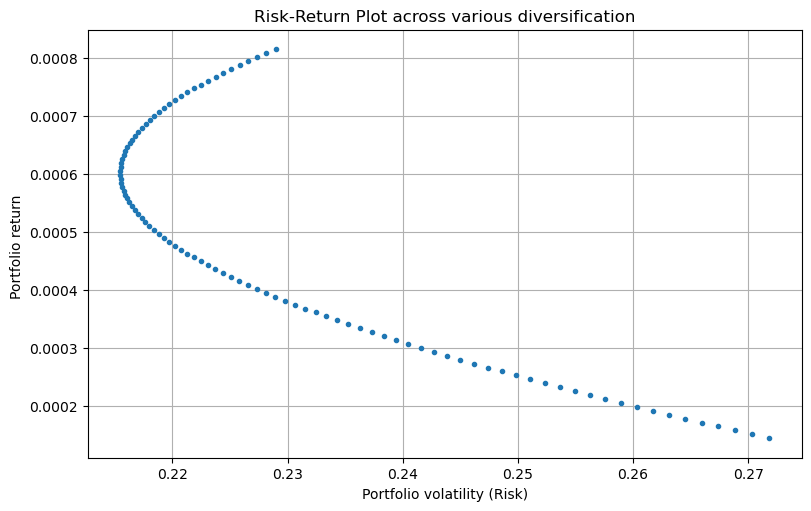

In [21]:
fig5, ax5 = plt.subplots(1, 1, figsize=[8, 5], layout="constrained")
ax5.plot(portfolio_return_log_std, portfolio_return_log_mean, ".")
ax5.set_xlabel('Portfolio volatility (Risk)')
ax5.set_ylabel('Portfolio return ')
ax5.set_title('Risk-Return Plot across various diversification' \
'')
ax5.grid("on")

The risk-return plot clearly show that tehir exsist a specific portfolio such that the risk of the entire portfolio is minimized. This can be formulated as follow:

Suppose the daily return rate of stock 1 is represented by a random variable $X_1$ with mean and variance $\mu_1$ and $\sigma_1^2$. Similarly for stock 2. The construction of portfolio is done by diversify investment to each stock with weight $w_1, w_2$ where $w_1 + w_2=1$, denoated as $P=w_1X_1+w_2X_2$. The expected return and varaince of portofolio is thus
$$
\begin{aligned}
  E(P)&=w_1E(X_1)+w_2E(X_2)=w_1\mu_1+w_2\mu_2\\
  \mathrm{Var}(P)&=\mathrm{Var}(w_1X_1+w_2X_2)=w_1^2\mathrm{Var}(X_1)+w_2^2\mathrm{Var}(X_2)+2w_1w_2\mathrm{Cov}(X_1, X_2)\\
  &=w_1^2\sigma^2_1+w_2^2\sigma^2_2+2w_1\sigma_1w_2\sigma_2\rho_{12}
\end{aligned}
$$
The risk of portfolio is in general not the linear combination of the risk of each stock due to nonlinearity of variance. However, when the two stock are perfectly positive correlated ($\rho_{12}=1$), then $\mathrm{Var}(P)=(w_1\sigma_1+w_2\sigma_2)^2$ and the standard deviation of portfolio become the weighted average of composed stock risk. On the other hand, if the two stock are perfectly negtive correlated, then the standard deviation of portfolio become $\sigma_P=w_1\sigma_1-w_2\sigma_2$. In this case, it possible to find a specific portfolio with no risk. 

In reality, it is impossible to achive pefect correlation. Thus, in general, the varaince can be expressed in a quadratic form under condition $w_1+w_2=1$:
$$
\mathrm{Var}(P)=w_2^2(\sigma^2_1+\sigma^2_2-2\sigma_1\sigma_2\rho_{12}) + 2w_2(\sigma_1\sigma_2\rho_{12}-\sigma^2_1)+\sigma^2_1
$$
which has globle minimum at $w^*_2=\frac{\sigma^2_1-\sigma_1\sigma_2\rho_{12}}{\sigma^2_1+\sigma^2_2-2\sigma_1\sigma_2\rho_{12}}$. 
* Notide that the globle minimum is not alwasy attained under the condition that $w_2\in[0, 1]$

In [ ]:
# get covariance matrix in yearly ratio
cov = daily_return_log.cov() * 252
# get std for each stock
sigma1 = np.sqrt(cov.iloc[0, 0])
sigma2 = np.sqrt(cov.iloc[1, 1])
# get correlation coefficient
rho12 = cov.iloc[0, 1] / (sigma1 * sigma2)
# optimized diversification ratio
w2_min = (sigma1**2 - sigma1 * sigma2 * rho12) / (
    sigma1**2 + sigma2**2 - 2 * sigma1 * sigma2 * rho12
)
w1_min = 1 - w2_min

In [23]:
# construct risk minimized portfolio 
portfolio_daily_return_log_min = (
    w1_min * daily_return_log["AAPL"] + w2_min * daily_return_log["MSFT"]
)
portfolio_daily_return_log_min_mean = np.mean(portfolio_daily_return_log_min)
portfolio_daily_return_log_min_std = np.std(portfolio_daily_return_log_min) * np.sqrt(
    252
)

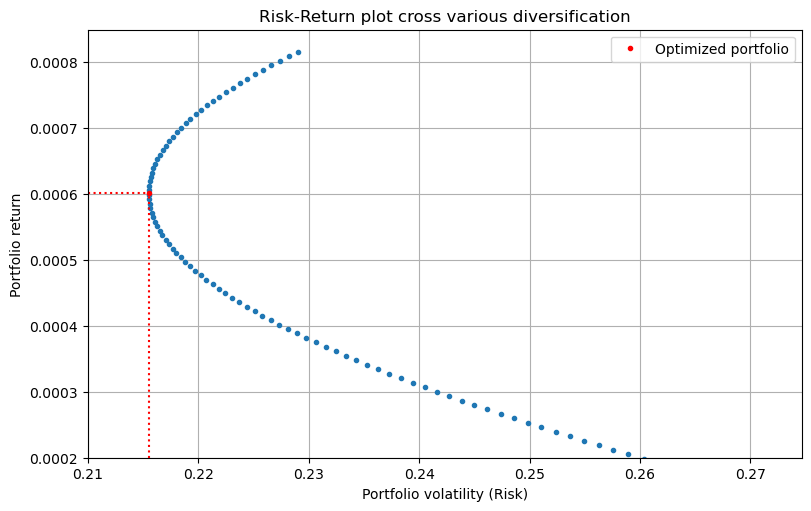

In [24]:
fig6, ax6 = plt.subplots(1, 1, figsize=[8, 5], layout="constrained")
ax6.plot(portfolio_return_log_std, portfolio_return_log_mean, ".")
ax6.plot(
    portfolio_daily_return_log_min_std, portfolio_daily_return_log_min_mean, ".", c="r", label='Optimized portfolio'
)
ax6.set_xlim(xmin=0.21)
ax6.set_ylim(ymin=0.0002)
ax6.hlines(
    y=portfolio_daily_return_log_min_mean,
    xmin=ax6.get_xlim()[0],
    xmax=portfolio_daily_return_log_min_std,
    linestyles=":",
    colors="r"
)
ax6.vlines(
    x=portfolio_daily_return_log_min_std,
    ymin=ax6.get_ylim()[0],
    ymax=portfolio_daily_return_log_min_mean,
    linestyles=":",
    color="r",
)
ax6.legend()
ax6.set_xlabel('Portfolio volatility (Risk)')
ax6.set_ylabel('Portfolio return')
ax6.set_title("Risk-Return plot cross various diversification")
ax6.grid("on")

The minimized point we found is exactly the risk minimize point shown in the risk-return plot.


More generally, if we considered a investment diversification of $n$ stocks with weight $\mathbf{w}=[w_1, w_2, \cdots, w_n]^T, \sum_i w_i=1$.
$$
P=w_1X_1+w_2X_2+\cdots+w_nX_n
$$
the mean return of the portfolio will be
$$
E(P)=w_1E(X_1)+w_2E(X_2)+\cdots+w_nE(X_n)
$$
which is the weighted average of the return of each stock. The risk of the portfolio is
$$
\mathrm{Var}(P)=\mathrm{Var}(w_1E(X_1)+w_2E(X_2)+\cdots+w_nE(X_n))=\sum_iw_i^2\mathrm{Var}(X_i)+2\sum_{i\neq j}w_iw_j\mathrm{Cov}(X_i, X_j)\\
=\mathbf{w}^T K \mathbf{w}
$$
where
$$
K=\begin{pmatrix}
\sigma_1^2&\mathrm{Cov}(X_1, X_2)&\cdots&\mathrm{Cov}(X_1, X_n)\\
\mathrm{Cov}(X_2, X_1)&\sigma_2^2&\cdots&\mathrm{Cov}(X_2, X_n)\\
\vdots&\vdots&\ddots&\vdots\\
\mathrm{Cov}(X_n, X_1)&\cdots&\cdots&\sigma_n^2
\end{pmatrix}
$$
is the covariance matrix. The risk of the portfolio is in quadratic form and can be minizmed under the constrain $\sum_iw_i=1$

In [25]:
# get stock data from past two year
start_date = dt.datetime.today() - dt.timedelta(days = 365 * 2)
end_date = dt.datetime.today()

# symbols for Microsoft (MSFT) and Apple (AAPL)
multi_tickers = ['MSFT', 'AAPL', 'AMD', 'IBM', 'INTC', 'NVDA']
n_stocks = len(multi_tickers)

# download data 
multi_stock = yf.download(multi_tickers, start=start_date, end=end_date)


[*********************100%***********************]  6 of 6 completed


In [26]:
# get close price 
multi_close = multi_stock['Close']
# get log return data
multi_daily_return_log = np.log(multi_close/multi_close.shift(1)).dropna()

In [27]:
multi_daily_return_log

Ticker,AAPL,AMD,IBM,INTC,MSFT,NVDA
Date,,,,,,
2023-06-30,0.022840,0.023719,-0.001867,0.015976,0.016253,0.035613
2023-07-03,-0.007815,0.016629,-0.001047,0.005368,-0.007516,0.002621
2023-07-05,-0.005889,-0.016278,0.004255,-0.033573,0.000473,-0.002266
2023-07-06,0.002506,-0.004133,-0.015616,-0.016750,0.009184,-0.005070
2023-07-07,-0.005909,-0.002736,-0.000606,-0.003761,-0.011938,0.009456
...,...,...,...,...,...,...
2025-06-23,0.002484,0.010395,0.028801,0.005205,0.017854,0.002222
2025-06-24,-0.005973,0.066066,0.015816,0.062206,0.008421,0.025543
2025-06-25,0.006271,0.035273,-0.009336,-0.015643,0.004397,0.042427


In [28]:
multi_daily_return_log.mean()

Ticker
AAPL    0.000138
AMD     0.000514
IBM     0.001684
INTC   -0.000703
MSFT    0.000815
NVDA    0.002705
dtype: float64

In [29]:
multi_daily_return_log.std() * np.sqrt(252)

Ticker
AAPL    0.273606
AMD     0.493854
IBM     0.243318
INTC    0.533583
MSFT    0.229210
NVDA    0.516481
dtype: float64

In [30]:
# create weight vector for constructing portfolio
w = np.repeat(1/n_stocks, n_stocks)[:, np.newaxis]

# construct portfolio by linear combination
portfolio_daily_return_log_multi = multi_daily_return_log @ w
portfolio_daily_return_log_multi=portfolio_daily_return_log_multi.rename(columns={0:'portfolio return'})

portfolio_daily_return_log_multi

,portfolio return
Date,
2023-06-30,0.018756
2023-07-03,0.001373
2023-07-05,-0.008879
2023-07-06,-0.004980
2023-07-07,-0.002582
...,...
2025-06-23,0.011160
2025-06-24,0.028680
2025-06-25,0.010565


In [ ]:
# portfolio mean
portfolio_daily_return_log_multi.mean()

portfolio return    0.000859
dtype: float64

In [ ]:
# portfolio std
portfolio_daily_return_log_multi.std() * np.sqrt(252)

portfolio return    0.274207
dtype: float64

Using the covariance matrix and quadratic optimization method, we can construct the portfolio that minimize the volatility under specific constrain. 

In [34]:
# get yearly convariance matrix
cov_mat = multi_daily_return_log.cov() * 252

<Axes: xlabel='Ticker', ylabel='Ticker'>

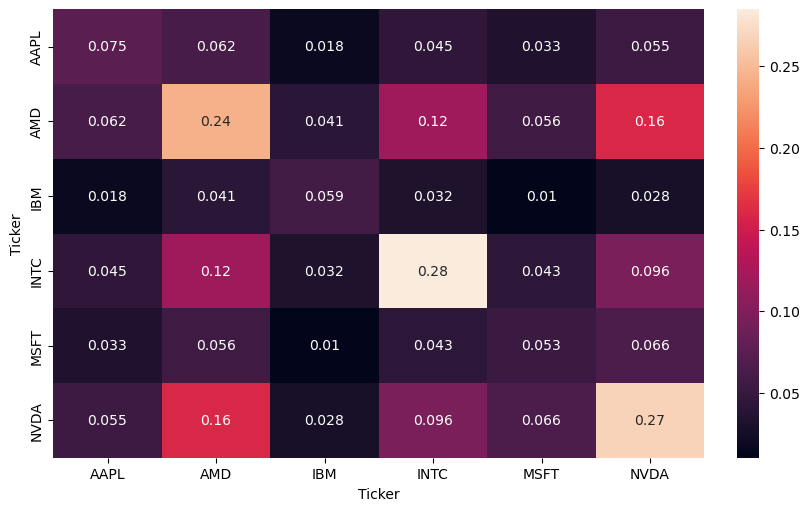

In [35]:
fig7, ax7 = plt.subplots(1, 1, figsize=[8, 5], layout='constrained')
sns.heatmap(cov_mat, ax=ax7, annot=True)

In [37]:
from scipy.optimize import minimize

# initialize weight vector
init_w = w.flatten()

# function which return the portfolio valitility
def portfolio_std(w):
    return np.sqrt(w.T @ cov_mat @ w)

# constrains are set up such that the weight vectors sums to 1 and short position is not allowed
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
               {'type': 'ineq', 'fun': lambda w: np.min(w)})

minimize_result = minimize(portfolio_std, init_w, constraints=constraints)

# Optimal asset weights
optimal_weights = minimize_result.x

# Print the optimal weights and expected returns
print(f"Optimzied portfolio weight: {optimal_weights}")

Optimzied portfolio weight: [ 1.30066572e-01  4.71241635e-07  4.24868428e-01  1.01643954e-19
  4.45064986e-01 -4.57245470e-07]


In [38]:
portfolio_daily_return_log_multi_optimal = multi_daily_return_log @ optimal_weights[:, np.newaxis]

In [42]:
print(f"Average portfolio return: {portfolio_daily_return_log_multi_optimal.mean()[0]}")

Average portfolio return: 0.0010962493883750954


In [45]:
print(f"Portfolio volatility: {portfolio_daily_return_log_multi_optimal.std()[0] * np.sqrt(252)}")

Portfolio volatility: 0.17918175337354025


The optimized portfolio now have much smaller std comparing to the portfolio we constructed before. 